# Toxicity Detection - Exploratory Data Analysis

### **Goal:** Understand the Jigsaw Toxic Comment dataset structure, class distribution, and text characteristics.

### **Key Questions:**
### 1. How balanced are the toxicity labels?
### 2. What's the typical text length?
### 3. Are labels correlated (e.g., toxic + insult)?
### 4. What words distinguish toxic vs. clean comments?

In [1]:
# Quick data check
import pandas as pd

# Load data
train_df = pd.read_csv('../data/train.csv')

print(f"Data loaded successfully!")
print(f"Shape: {train_df.shape}")
print(f"Columns: {list(train_df.columns)}")
print(f"\nFirst row:")
print(train_df.head(1))

Data loaded successfully!
Shape: (159571, 8)
Columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

First row:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  



### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Set style

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports complete")

Imports complete


### 1. Load Data

In [4]:
# Load training data
train_df = pd.read_csv('../data/train.csv')

print(f"Dataset shape: {train_df.shape}")
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nFirst 3 rows:")
display(train_df.head(3))

Dataset shape: (159571, 8)

Columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

First 3 rows:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


### Define label columns

In [5]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print(f"Number of labels: {len(label_cols)}")
print(f"Labels: {label_cols}")

Number of labels: 6
Labels: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


### 2. Basic Statistics

In [6]:
print("BASIC STATISTICS")

print(f"\nTotal comments: {len(train_df):,}")
print(f"Unique comments: {train_df['comment_text'].nunique():,}")
print(f"Duplicate comments: {len(train_df) - train_df['comment_text'].nunique():,}")

# Missing values
print("\nMissing values:")
display(train_df.isnull().sum())


BASIC STATISTICS

Total comments: 159,571
Unique comments: 159,571
Duplicate comments: 0

Missing values:


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

### 3. Label Distribution Analysis

In [7]:
print("LABEL DISTRIBUTION")

# Count each label
label_counts = train_df[label_cols].sum().sort_values(ascending=False)
label_percentages = (label_counts / len(train_df) * 100).round(2)

# Create summary dataframe
dist_df = pd.DataFrame({
    'Label': label_counts.index,
    'Count': label_counts.values,
    'Percentage': label_percentages.values
})

display(dist_df)

LABEL DISTRIBUTION


,Label,Count,Percentage
0,toxic,15294,9.58
1,obscene,8449,5.29
2,insult,7877,4.94
3,severe_toxic,1595,1.00
4,identity_hate,1405,0.88
5,threat,478,0.30


In [8]:
# Clean vs toxic comments
clean_count = (train_df[label_cols].sum(axis=1) == 0).sum()
toxic_count = len(train_df) - clean_count

print(f"\n{'Category':<15} {'Count':>10} {'Percentage':>12}")
print("-" * 40)
print(f"{'Clean':<15} {clean_count:>10,} {clean_count/len(train_df)*100:>11.2f}%")
print(f"{'Toxic':<15} {toxic_count:>10,} {toxic_count/len(train_df)*100:>11.2f}%")



Category             Count   Percentage
----------------------------------------
Clean              143,346       89.83%
Toxic               16,225       10.17%


In [9]:
# Multi-label analysis
multi_label = train_df[label_cols].sum(axis=1)

print("MULTI-LABEL STATISTICS")

print(f"\nComments with 0 labels: {(multi_label == 0).sum():,}")
print(f"Comments with 1 label:  {(multi_label == 1).sum():,}")
print(f"Comments with 2+ labels: {(multi_label > 1).sum():,}")
print(f"Max labels per comment: {multi_label.max()}")


MULTI-LABEL STATISTICS

Comments with 0 labels: 143,346
Comments with 1 label:  6,360
Comments with 2+ labels: 9,865
Max labels per comment: 6


In [10]:
# Distribution
multi_dist = multi_label.value_counts().sort_index()
print("\nLabel count distribution:")
display(multi_dist)



Label count distribution:


0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64

### 4. Visualizations

## Plot 1: Label distribution

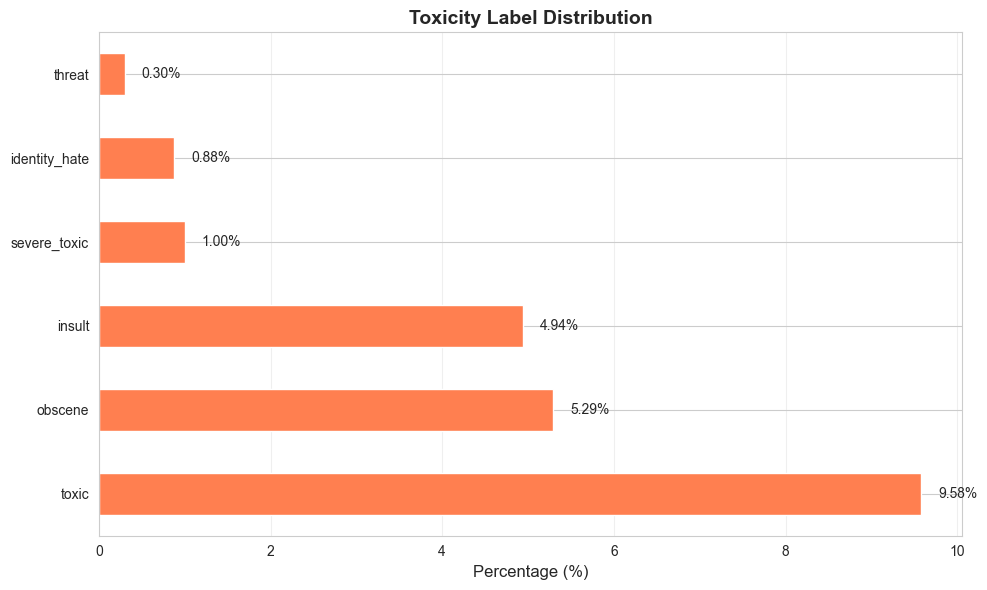

Saved: figures/01_label_distribution.png


In [11]:

fig, ax = plt.subplots(figsize=(10, 6))
label_percentages.plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_title('Toxicity Label Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(label_percentages):
    ax.text(v + 0.2, i, f'{v:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../figures/01_label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: figures/01_label_distribution.png")


## Plot 2: Label correlation heatmap

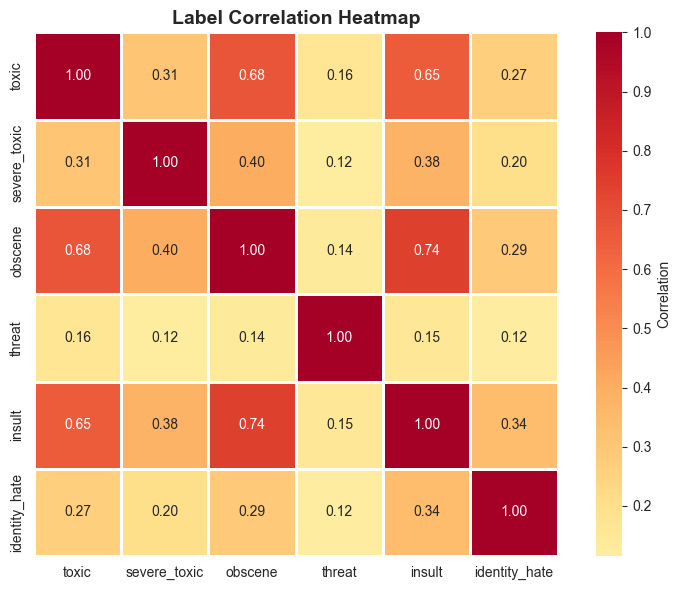

Saved: figures/02_label_correlation.png


In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
correlation = train_df[label_cols].corr()

sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Label Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/02_label_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: figures/02_label_correlation.png")


## Plot 3: Multi-label distribution

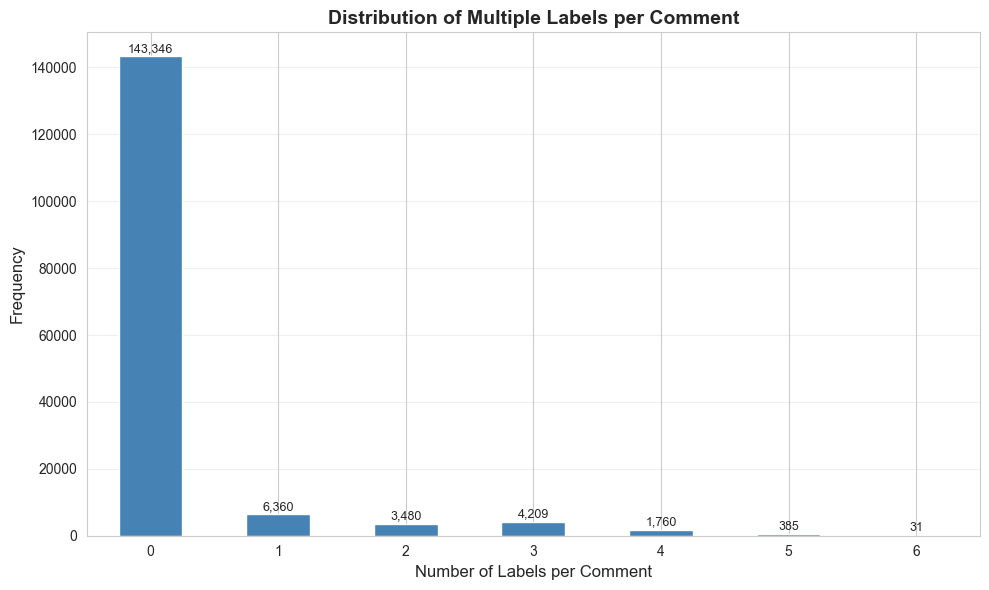

Saved: figures/03_multilabel_distribution.png


In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
multi_dist.plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Number of Labels per Comment', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Multiple Labels per Comment', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add value labels
for i, v in enumerate(multi_dist.values):
    ax.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../figures/03_multilabel_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: figures/03_multilabel_distribution.png")


### 5. Text Length Analysis

In [14]:
# Calculate text statistics
train_df['text_length'] = train_df['comment_text'].str.len()
train_df['word_count'] = train_df['comment_text'].str.split().str.len()

print("TEXT LENGTH STATISTICS")

print("\nCharacter count statistics:")
display(train_df['text_length'].describe())

print("\nWord count statistics:")
display(train_df['word_count'].describe())


TEXT LENGTH STATISTICS

Character count statistics:


count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: text_length, dtype: float64


Word count statistics:


count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: word_count, dtype: float64

In [15]:
# Compare toxic vs clean
toxic_mask = train_df[label_cols].sum(axis=1) > 0

comparison_df = pd.DataFrame({
    'Category': ['Toxic', 'Clean'],
    'Avg_Characters': [
        train_df[toxic_mask]['text_length'].mean(),
        train_df[~toxic_mask]['text_length'].mean()
    ],
    'Avg_Words': [
        train_df[toxic_mask]['word_count'].mean(),
        train_df[~toxic_mask]['word_count'].mean()
    ]
})

display(comparison_df)

,Category,Avg_Characters,Avg_Words
0,Toxic,303.304037,52.717720
1,Clean,404.347174,68.921065


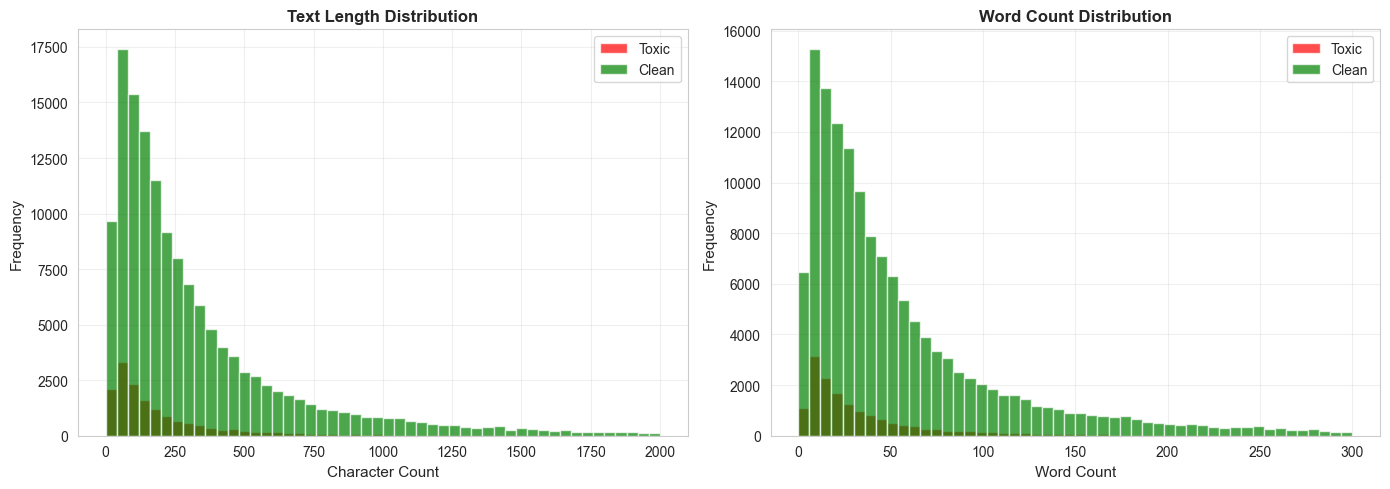

Saved: figures/04_text_length_distribution.png


In [16]:
# Plot: Text length distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character count
axes[0].hist(train_df[toxic_mask]['text_length'], bins=50, alpha=0.7, 
             label='Toxic', color='red', range=(0, 2000))
axes[0].hist(train_df[~toxic_mask]['text_length'], bins=50, alpha=0.7, 
             label='Clean', color='green', range=(0, 2000))
axes[0].set_xlabel('Character Count', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Text Length Distribution', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count
axes[1].hist(train_df[toxic_mask]['word_count'], bins=50, alpha=0.7, 
             label='Toxic', color='red', range=(0, 300))
axes[1].hist(train_df[~toxic_mask]['word_count'], bins=50, alpha=0.7, 
             label='Clean', color='green', range=(0, 300))
axes[1].set_xlabel('Word Count', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/04_text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: figures/04_text_length_distribution.png")


### 6. Sample Comments

In [17]:
print("SAMPLE COMMENTS")

print("\n--- CLEAN COMMENTS ---")
for i, row in train_df[~toxic_mask].sample(3, random_state=42).iterrows():
    print(f"\n{row['comment_text'][:300]}...")

print("\n--- TOXIC COMMENTS ---")
for i, row in train_df[toxic_mask].sample(3, random_state=42).iterrows():
    labels = [col for col in label_cols if row[col] == 1]
    print(f"\nLabels: {labels}")
    print(f"{row['comment_text'][:300]}...")

SAMPLE COMMENTS

--- CLEAN COMMENTS ---

"

Oh, don't worry about me, Sandstein. I'm of no strong opinion as to what is ""well."" Editing Wikipedia is not a personal benefit; if it were, I'd be COI! I do have some unfinished business, both with articles and ""arbitration or sanctions,"" such as the RfAr/Clarification and a dispute over my ...

Are you trying to dispute that fact?...

SWOT analysis 

This source – Align Technology, Inc. SWOT Analysis. (2013). 1-8. – is used 11 times, with no indication of how to find it or whether it's a primary source (I assume it is), so I'm going to remove anything sourced to it. Leaving this note in case there are objections.  (talk)...

--- TOXIC COMMENTS ---

Labels: ['toxic']
"
I was talking about them running any check they want on ME to disprove your claims.  I didn't know where you lived until you were silly enough to post an IP and connect your name to it. And yes you did post as an IP,  and other places. You added your name at the end of the

### 7. Key Insights & Summary

In [18]:
print(f"""
1. CLASS IMBALANCE:
   - Dataset is heavily imbalanced: {clean_count/len(train_df)*100:.1f}% clean vs {toxic_count/len(train_df)*100:.1f}% toxic
   - Most common toxic label: {label_counts.index[0]} ({label_percentages.iloc[0]:.2f}%)
   - Rarest toxic label: {label_counts.index[-1]} ({label_percentages.iloc[-1]:.2f}%)

2. MULTI-LABEL PATTERNS:
   - {(multi_label > 1).sum():,} comments have multiple labels
   - Highest correlation: between '{correlation.unstack().sort_values(ascending=False).index[1][0]}' 
     and '{correlation.unstack().sort_values(ascending=False).index[1][1]}'

3. TEXT CHARACTERISTICS:
   - Toxic comments are slightly longer on average
   - Average toxic length: {train_df[toxic_mask]['text_length'].mean():.0f} chars
   - Average clean length: {train_df[~toxic_mask]['text_length'].mean():.0f} chars
""")


1. CLASS IMBALANCE:
   - Dataset is heavily imbalanced: 89.8% clean vs 10.2% toxic
   - Most common toxic label: toxic (9.58%)
   - Rarest toxic label: threat (0.30%)

2. MULTI-LABEL PATTERNS:
   - 9,865 comments have multiple labels
   - Highest correlation: between 'severe_toxic' 
     and 'severe_toxic'

3. TEXT CHARACTERISTICS:
   - Toxic comments are slightly longer on average
   - Average toxic length: 303 chars
   - Average clean length: 404 chars



In [19]:
# Export summary
summary = {
    'total_comments': len(train_df),
    'toxic_comments': int(toxic_count),
    'clean_comments': int(clean_count),
    'label_distribution': label_counts.to_dict(),
    'avg_text_length_toxic': float(train_df[toxic_mask]['text_length'].mean()),
    'avg_text_length_clean': float(train_df[~toxic_mask]['text_length'].mean()),
    'max_labels_per_comment': int(multi_label.max()),
    'comments_with_multiple_labels': int((multi_label > 1).sum())
}

import json
with open('../figures/eda_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("\n Saved: figures/eda_summary.json")
print("\n EDA COMPLETE!")


 Saved: figures/eda_summary.json

 EDA COMPLETE!
